In [ ]:
import requests as req
import numpy as np
import matplotlib.pyplot as plt
import re
import string

# Getting the text
book = req.get('https://gutenberg.org/files/35/35-0.txt')
text = book.text

In [ ]:
stringsToReplace = [
                 '\r\n\r\nâ\x80\x9c', # new paragraph
                 'â\x80\x9c',         # open quote
                 'â\x80\x9d',         # close quote
                 '\r\n',              # new line
                 'â\x80\x94',         # hyphen
                 'â\x80\x99',         # single apostrophe
                 'â\x80\x98',         # single quote
                 '_',                 # underscore, used for stressing
                 ]

In [ ]:
for pattern in stringsToReplace:
  expression = re.compile(pattern)
  text = expression.sub(' ', text)

In [ ]:
words = text.split()

def wordLength(word: str):
  length = 0
  for character in word:
    if character.isalpha():
      length += 1
  return length

In [ ]:
lengthDict = dict()
for word in words:
  length = wordLength(word)
  if not length in lengthDict:
    lengthDict[length] = []
  lengthDict[length].append(word)


In [ ]:
wordCountDict = dict()

for length in lengthDict.keys():
  wordCountDict[length] = len(lengthDict[length])

In [ ]:
# with using numpy

In [ ]:
wordLengths = np.zeros(len(words))
for i in range(len(words)):
  wordLengths[i] = wordLength(words[i])

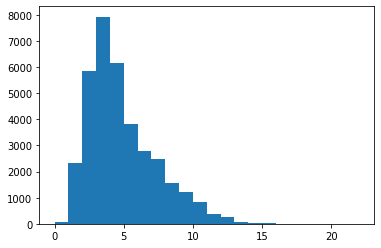

In [ ]:
plt.hist(wordLengths, bins=int(np.max(wordLengths)))
plt.show()

In [ ]:
wordCounts = np.zeros(23)
for i in range(len(words)):
  index = wordLength(words[i])
  wordCounts[index] += 1


In [ ]:
wordCounts

array([5.300e+01, 2.313e+03, 5.853e+03, 7.934e+03, 6.169e+03, 3.833e+03,
       2.782e+03, 2.495e+03, 1.565e+03, 1.203e+03, 8.360e+02, 3.790e+02,
       2.420e+02, 8.500e+01, 3.700e+01, 1.600e+01, 6.000e+00, 2.000e+00,
       2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00])

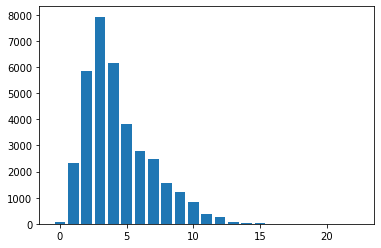

In [ ]:
plt.bar(range(len(wordCounts)), wordCounts)
plt.show()

In [ ]:
# Calculating character frequencies
letters = string.ascii_lowercase
letterCounts = np.zeros(len(letters))
n = 0
for letter in letters:
  counted = text.lower().count(letter)
  letterCounts[n] = counted
  n += 1

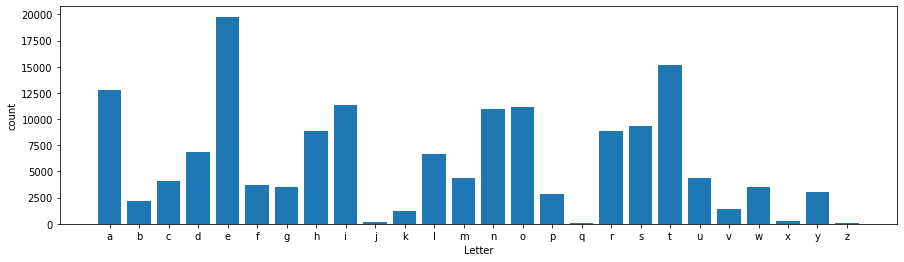

In [ ]:
fig,ax = plt.subplots(1, figsize=(15,4))
ax.bar(range(len(letters)), letterCounts)
ax.set_xticks(range(len(letters)))
ax.set_xticklabels(letters)
ax.set_xlabel('Letter')
ax.set_ylabel('count')
plt.show()

In [ ]:
sumLetters = int(np.sum(letterCounts))
relativeOccurrenceOfLetters = letterCounts / sumLetters
relativeOccurrenceOfLetters
entropyOfLetters = - relativeOccurrenceOfLetters * np.log2(relativeOccurrenceOfLetters)
entropy = np.sum(entropyOfLetters)

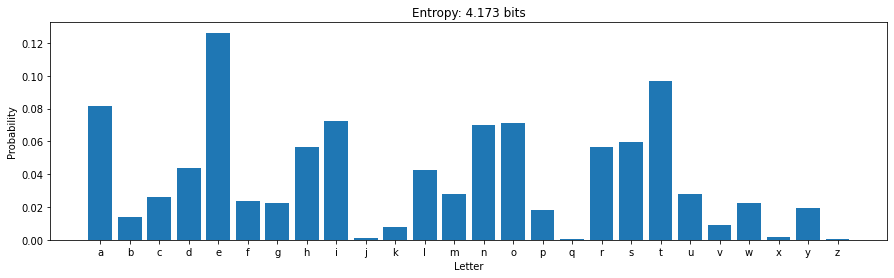

In [ ]:
fig,ax = plt.subplots(1, figsize=(15,4))
ax.bar(range(len(letters)), relativeOccurrenceOfLetters)
ax.set_xticks(range(len(letters)))
ax.set_xticklabels(letters)
ax.set_xlabel('Letter')
ax.set_ylabel('Probability')
ax.set_title(f'Entropy: {round(entropy,3)} bits')
plt.show()

In [ ]:
# Calculating conditional entropy

In [ ]:
letters = string.ascii_lowercase
numberOfLetters = len(letters)
probmat = np.zeros((numberOfLetters, numberOfLetters))
text = text.lower()
for i in range(len(text) - 1):
  currentLetter = text[i]
  nextLetter = text[i+1]
  if (currentLetter in letters) and (nextLetter in letters):
    i = letters.index(currentLetter)
    j = letters.index(nextLetter)
    probmat[i, j] += 1


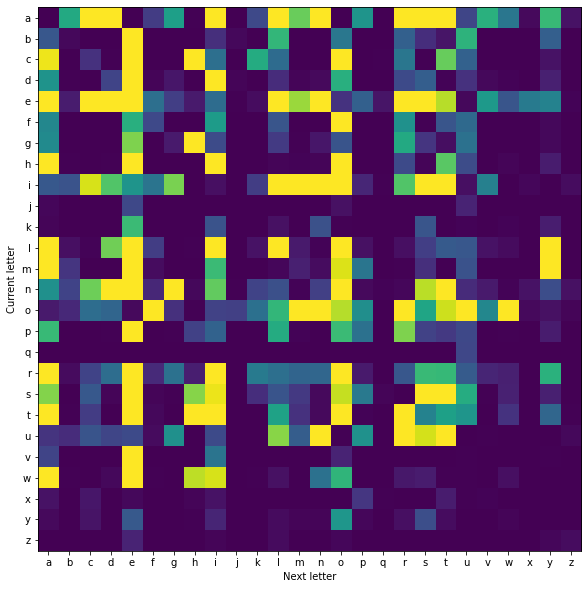

In [ ]:
fig,ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(probmat,vmax=500)
ax.set_ylabel('Current letter')
ax.set_xlabel('Next letter')
ax.set_xticks(range(numberOfLetters))
ax.set_yticks(range(numberOfLetters))
ax.set_xticklabels(letters)
ax.set_yticklabels(letters)
plt.show()

In [ ]:
conditionalEntropy = np.zeros(numberOfLetters)
for i in range(numberOfLetters):
  probs = probmat[i,:] + np.finfo(float).eps
  probs = probs / sum(probs)
  conditionalEntropy[i] = -sum(probs * np.log2(probs))

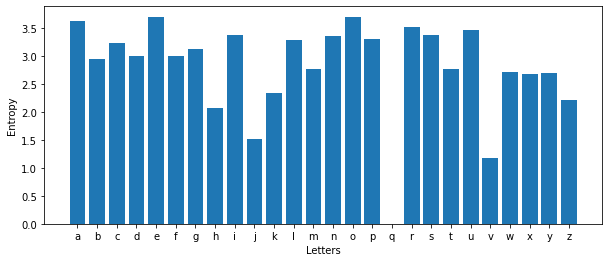

In [ ]:
fig,ax = plt.subplots(1, figsize=(10,4))
ax.bar(range(numberOfLetters), conditionalEntropy)
ax.set_xlabel('Letters')
ax.set_xticks(range(numberOfLetters))
ax.set_xticklabels(letters)
ax.set_ylabel('Entropy')
plt.show()

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(text)

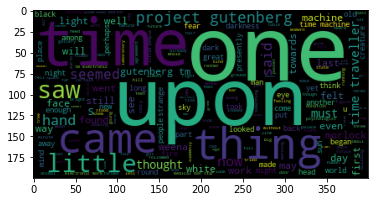

In [ ]:
plt.imshow(wordcloud)
plt.show()